# Introdução à Programação em Python
## Notebook 05 - Programação imperativa
## Carlos Caleiro, Jaime Ramos
## Dep. Matemática, IST - 2016

(actualizado em 22 de Fevereiro de 2019)

# Programação imperativa

A programação imperativa é provavelmente o mais comum dos paradigmas de programação, até por ser aquele que mais se aproxima da máquina de registos subjacente à arquitectura de Von Neumann, que persiste como o modelo básico dos computadores actuais. 

De forma simplista, a programação imperativa consiste na definição de procedimentos que executam sequências de acções básicas, tipicamente atribuições. Tira partido portanto da composição sequencial, para além da composição alternativa, e de mecanismos essenciais de composição iterativa que introduziremos de seguida.

A terminologia *programação imperativa* resulta da ideia subjacente à execução sequencial de acções (faz isto, faz aquilo), pelo que é usual denominar as instruções dos programas imperativos por *comandos*.

## Primeiros exemplos

### Factorial

É útil, para introduzir a programação imperativa, atentar na estrutura das definições recursivas iterativas. Recorde-se a definição iterativa da função que calcula o factorial de um número natural desenvolvida anteriormente.

In [1]:
def factorialiter(n):
    
    def factorialaux(i,r):
        if i==0:
            return r
        else:
            return factorialaux(i-1,r*i)
    
    return factorialaux(n,1)

O cálculo do factorial de `4`, por exemplo, espoleta a cadeia de chamadas recursivas 

`factorialaux(4,1)` $\Longrightarrow$ `factorialaux(3,4)` $\Longrightarrow$ `factorialaux(2,12)` $\Longrightarrow$ 
`factorialaux(1,24)` $\Longrightarrow$ `factorialaux(0,24)` $\Longrightarrow$ `24`.

Isto significa que a computação transporta consigo dois valores, actualizando-os a cada passo, até atingir o resultado final. Concretamente, se denominarmos os valores, respectivamente, por `i` e `r`, `i` é inicializado com o valor de que queremos calcular o factorial (`4`) e `r` é inicializado com `1`. A cada passo, `r` é multiplicado por `i`, ao qual se subtrai `1`. O processo termina quando o valor de `i` é `0`, retornando como resultado o valor de `r`.  

Veja-se agora como a seguinte definição, imperativa, implementa exactamente esta sequência de acções.

In [3]:
def factorial(n):
    i=n
    r=1
    while i!=0:
        r=r*i
        i=i-1
    return r

In [9]:
factorial(400)

64034522846623895262347970319503005850702583026002959458684445942802397169186831436278478647463264676294350575035856810848298162883517435228961988646802997937341654150838162426461942352307046244325015114448670890662773914918117331955996440709549671345290477020322434911210797593280795101545372667251627877890009349763765710326350331533965349868386831339352024373788157786791506311858702618270169819740062983025308591298346162272304558339520759611505302236086810433297255194852674432232438669948422404232599805551610635942376961399231917134063858996537970147827206606320217379472010321356624613809077942304597360699567595836096158715129913822286578579549361617654480453222007825818400848436415591229454275384803558374518022675900061399560145595206127211192918105032491008000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

Vale a pena confirmar, na emulação da execução, que o comportamento é o desejado. Note-se, em particular, como é fundamental a ordem das acções no passo do ciclo.

In [1]:
from IPython.core.display import display, HTML
display(HTML('<iframe width="800" height="500" frameborder="0" src="https://pythontutor.com/iframe-embed.html#code=def+factorial(n%29%3A%0A++++i%3Dn%0A++++r%3D1%0A++++while+i!%3D0%3A%0A++++++++r%3Dr*i%0A++++++++i%3Di-1%0A++++return+r%0A%0Afactorial(4%29&origin=opt-frontend.js&cumulative=false&heapPrimitives=false&textReferences=false&py=3&rawInputLstJSON=%5B%5D&curInstr=0&codeDivWidth=350&codeDivHeight=400"> </iframe>'))

Note-se que a construção crucial da definição é o *ciclo* definido por `while`. Esta primitiva permite o mais geral dos mecanismos de *composição iterativa*, sem a qual o poder computacional da programação imperativa se veria severamente diminuído. A estrutura básica de um `while` é dada por:


`while condição: 
    passo`

onde `condição` é uma expressão Booleana, denominada a *guarda* do ciclo e `passo` um comando. A semântica da construção é intuitiva, enquanto a `condição` for verdadeira executa-se o `passo`. Após a execução do `passo` volta a avaliar-se a `condição`, cujo valor lógico pode ter mudado. O ciclo é dito *infinito* se a condição for verdadeira para todo o sempre.


In [10]:
factorial(-2)

KeyboardInterrupt: 

Interrompemos explicitamente a computação usando **Kernel-Interrupt** no menu, já que neste caso a guarda do ciclo nunca será falsa. Como é óbvio, podem ser usadas técnicas semelhantes às que vimos antes para tornar os programas robustos a argumentos indesejados.

Vale a pena notar que em Python os parâmetros formais das definições têm o mesmo carácter dos nomes locais. Isto significa, no exemplo em apreço, que `n` tal como `i` e `r` são nomes locais. Por esta razão, `i` é de facto desnecessário. 

In [6]:
def factorial(n):
    r=1
    while n!=0:
        r=r*n
        n=n-1
    return r

In [7]:
factorial(4)

24

### Lista de factoriais

Recorde-se agora a definição iterativa da função que, dada uma lista de números naturais, calcula a lista dos seus 
factoriais.

In [8]:
def flistaiter(w):
    
    def flistaaux(wfalta,wfeito):
        if wfalta==[]:
            return wfeito
        else:
            return flistaaux(wfalta[1:],wfeito+[factorial(wfalta[0])])
        
    return flistaaux(w,[])

É relativamente simples construir, usando a ideia usada acima, uma definição imperativa equivalente.

In [9]:
def flista(w):
    wfeito=[]
    while w!=[]:
        wfeito=wfeito+[factorial(w[0])]
        w=w[1:]
    return wfeito

In [10]:
flista([3,5,4])

[6, 120, 24]

Obviamente, é possível obter o mesmo efeito percorrendo os valores da lista dada da direita para a esquerda.

In [11]:
def flista2(w):
    wfeito=[]
    while w!=[]:
        wfeito=[factorial(w[-1])]+wfeito
        w=w[:-1]
    return wfeito

In [12]:
flista2([3,5,4])

[6, 120, 24]

## Tópicos de programação imperativa (em Python)

### Programação estruturada

Advogamos, por todos os benefícios decorrentes, um conjunto de princípios propostos pelo cientista da computação 
E.W. Dijkstra, já nos anos 1960s, no sentido de clarificar, aumentar a qualidade e o tempo de desenvolvimento e manutenção dos programas. À época, era comum a utilização de linguagens de programação cujas estruturas de controlo incipientes (*goto*) davam origem àquilo que ficou conhecido como *programação em esparguete*.

Actualmente a teoria das linguagens de programação está muito mais desenvolvida, e muitas linguagens evitam, por desenho, que o programador tenha a tentação, ou o descuido, de fugir aos princípios da programação estruturada. No entanto, mesmo numa linguagem moderna como Python, há algumas escapatórias que, apesar de poderem ser bem utilizadas, devemos evitar sob pena de subvertermos o significado e estrutura lógica dos programas.

Recordamos abaixo a definição da função `factorial`, e introduzimos como duas definições alternativas.

In [13]:
def factorial(n):
    r=1
    while n!=0:
        r=r*n
        n=n-1
    return r

def maufactorial(n):
    r=1
    while True:
        if n!=0:
            r=r*n
            n=n-1
        else:
            return r    
        
def piorfactorial(n):
    r=1
    while 1:
        if n!=0:
            r=r*n
            n=n-1
        else:
            break
    return r    

In [14]:
factorial(4),maufactorial(4),piorfactorial(4)

(24, 24, 24)

Ambas as definições `maufactorial` e `piorfactorial` estão correctas, mas fazem uso de mecanismos de interrupção abrupta dos ciclos que devem ser evitados. Tais mecanismos fazem com que as guardas dos ciclos não sejam informativas relativamente à sua prossecução, tornando a análise lógica dos programas bastante difícil.

A definição de `maufactorial` usa como guarda do ciclo a condição `True`, sempre verdadeira, pelo que em princípio estaríamos na presença de um ciclo infinito (e de um programa que nunca terminaria). No entanto, o ciclo é interrompido abruptamente pela instrução `return` quando `n` toma o valor zero. Esta informação está totalmente explícita, como se advoga, na definição original de `factorial`. 

A função `piorfactorial` usa como guarda do ciclo o número `1` (não o tínhamos referido, precisamente por ser confuso e desnecessário, mas o Python interpreta zero como sendo `False` e qualquer outro número como sendo `True`), pelo que teríamos de novo um ciclo infinito. Neste caso, no entanto, o ciclo é interrompido abruptamente pela instrução `break` (que não tem outra utilidade). 

Desaconselha-se veementemente a utilização destes mecanismos.

### Atravessamento de listas

Há, em geral, diversas formas possíveis de percorrer os elementos de uma lista dada. A solução mais conveniente pode variar consoante o problema que queremos resolver.

A título de ilustração considere-se o problema de calcular um número natural a partir de uma lista dos seus dígitos. Destruindo a lista passo a passo, como fizemos acima, pode obter-se a seguinte definição.

In [15]:
def list2num(w):
    r=0
    while len(w)!=0:
        r=w[0]+10*r
        w=w[1:]
    return r

In [16]:
list2num([1,0,7,3])

1073

Curiosamente, não seria tão simples neste caso percorrer a lista da direita para a esquerda. O problema é simples: cada dígito da lista deve ser multiplicado por uma potência de `10` sendo o expoente determinado pela posição em que ocorre esse dígito. Um processo semelhante ao anterior não teria forma de contabilizar correctamente a posição. 

No entanto há uma outra forma de percorrer listas, muito mais conveniente e flexível, não por destruição da lista passo a passo, mas por acesso directo aos seus valores, posição a posição. 

In [17]:
def list2num_v2(w):
    r=0
    i=len(w)
    while i!=0:
        r=r+w[i-1]*(10**(len(w)-i))
        i=i-1
    return r

In [18]:
list2num_v2([1,0,7,3,8,0])

107380

Claro que, compreendido o mecanismo, poderíamos atingir essencialmente o mesmo fim percorrendo a lista da esquerda para a direita já que a construção do ciclo nos permite saber qual a posição da lista que está a ser processada  em cada passo.

### Efeitos colaterais

Os *efeitos colaterais* (modificação dos valores associados a nomes não locais) são uma das marcas distintivas da programação imperativa. Desejáveis, ou não, dependendo do contexto, os efeitos colaterais têm origem nas atribuições a nomes globais no corpo de uma definição ou, mais subtilmente no caso de tipos mutáveis, por atribuições ou execuções de métodos em nomes locais que refiram objectos também nomeados por algum nome global. 

Ilustramos estas questões com a seguinte solução imperativa para o cálculo da média de uma dada lista de valores.

In [19]:
def media(w):
    compr=len(w)
    if compr==0:
        return False
    else:
        global resultado
        soma=0
        while w!=[]:
            soma=soma+w.pop()
        resultado=soma/compr
        return True

In [20]:
valores=[1,2,3,4]
media(valores)

True

In [22]:
resultado

2.5

In [23]:
valores

[]

A definição acima calcula a média da lista dada por efeito colateral na variável `resultado`. Note-se que a definição é de facto uma função Booleana, que devolve True se a lista dada não for vazia e for portanto relevante consultar o resultado. Note-se que o procedimento actua ainda por efeito colateral na lista `valores` dada a disciplina de passagem de parâmetros do Python e a utilização do método `pop`.

O uso e controlo de eventuais efeitos colaterais é uma decisão do programador, que pode ser útil nalguns contextos. No entanto, note-se que não é difícil desenvolver programas errados precisamente devido a efeitos colaterais indesejados.

### Operadores de atribuição

É muito comum, não apenas em Python, a utilização de operadores de atribuição da forma

`#=`

onde `#` é um dos operadores aritméticos `+`, `-`, `*`, `/`, `**`, `//`, `%`.

O efeito imediato de

`nome #= expr`

é precisamente equivalente a

`nome = nome # expr`.

Não há um ganho óbvio de legibilidade, mas o código fica mais sucinto. Por exemplo, a nossa definição da função `factorial` poderia ser a seguinte.

In [24]:
def factorial(n):
    r=1
    while n!=0:
        r*=n
        n-=1
    return r

In [25]:
factorial(7)

5040

O mecanismo está disponível também para outros tipos para os quais as operações façam sentido. Nomeadamente, a nossa definição de `flista` poderia ter o seguinte aspecto.

In [26]:
def flista(w):
    wfeito=[]
    while w!=[]:
        wfeito+=[factorial(w[0])]
        w=w[1:]
    return wfeito

In [27]:
flista([7,8])

[5040, 40320]

### Composição iterativa revisitada: ciclos `for`

Para além da primitiva `while`, muitas linguagens de programação disponibilizam outros mecanismos de composição iterativa. Um dos mais comuns e extensivamente utilizados é a primitiva `for`. 

Na maioria das linguagens de programação imperativa os ciclos `for`, mais simples, servem o propósito de implementar ciclos cuja duração pode ser pré-calculada. São sempre, portanto, casos particulares de ciclos `while`.

Em Python, tais ciclos de duração predeterminada fazem uso da primitiva `range` para especificar os intervalos de variação desejados.

In [28]:
for i in range(1,10,3):
    print(i)

1
4
7


Não é difícil de perceber que o funcionamento de qualquer ciclo `for` da forma

`for i in range(a,b,c):
    passo`

é essencialmente equivalente, usando `while`, a

`i=a
while i<b:
    passo
    i+=c`


No entanto, em Python, o mecanismo associado à composição iterativa usando `for` é bem mais poderoso. Para além de `range`, é possível construir ciclos `for` a partir de qualquer objecto iterável (e.g., listas, *strings*, tuplos, ficheiros, dicionários).

In [29]:
for x in [3,5,7,9]:
    print(x)

3
5
7
9


Estes ciclos `for` mais gerais, da forma

`for i in iteravel:
    passo`

são ainda expressáveis, equivalentemente, usando `while`, mas com uma estrutura um pouco mais complexa, nomeadamente

`stop=False
seq=iter(iteravel)
while not stop:
    i=next(seq,None)
    if i==None:
        stop=True
    else:
        passo`


Adiamos para mais tarde o aprofundamento do funcionamento dos iteradores (associados a objectos iteráveis).

Claramente, os ciclos `for` dão-nos novas formas, expeditas, de atravessar listas. Recuperando o exemplo usado acima, de calcular o número representado por uma dada lista de dígitos, atente-se nas definições abaixo.

In [32]:
def list2num_v3(w):
    for i in range(len(w)):
        r+=w[i]*(10**(len(w)-i-1))
    return r

def list2num_v4(w):
    r=0
    for i,x in enumerate(w):
        r+=x*(10**(len(w)-i-1))
    return r

 A definição de `list2num_v3` é auto-explicativa. A definição `list2num_v4`, mais interessante, tira partido da primitiva `enumerate` que constrói iteradores formados por pares posição e valor. Tendo assim acesso directo ao valor `x` na posição `i` não é necessário lê-lo usando `w[i]`.

### Ciclos encaixados

Em programação é usual (e desejável) definir procedimentos/funções à custa de procedimentos/funções auxiliares. No entanto, no contexto da programação imperativa é possível encaixar diversos ciclos num só programa (algo que não é imediatamente possível em programação puramente recursiva). Isto nem sempre é desejável, principalmente porque os programas se tornam progressivamente mais difíceis de compreender, mesmo para o próprio programador, mas é útil em diversas circunstâncias, tipicamente quando falamos de 2 ciclos encaixados, no máximo 3.

Uma família de exemplos canónica é o cálculo de valores a partir de uma matriz dada. Atente-se, portanto no seguinte exemplo: uma função que recebendo uma matriz nos devolve o valor máximo na matriz, e também o índice da linha da matriz onde primeiro ocorre o seu valor mínimo.

In [1]:
def maximin(m):
    max=m[0][0]
    min=m[0][0]
    imin=0
    for i in range(len(m)):
        for j in range(len(m[0])):
            x=m[i][j]
            if x>max:
                max=x
            elif x<min:
                min=x
                imin=i
    return max,imin

In [34]:
m=[[3,4,8],[7,0,0],[0,6,0]]
maximin(m)

(8, 1)

## Exemplos complementares

### Método de Hondt

O método Hondt é talvez o algoritmo mais utilizado, em democracia, para converter votos em mandatos para órgãos de natureza colegial.

A ideia é muito simples: havendo vários mandatos para atribuir, se há $n$ listas concorrentes, cada uma com $v_n$ votos, e a cada uma já foram atribuídos $a_n$ mandatos (no início $a_n$ é obviamente $0$) então o próximo mandato é atribuído à lista com o máximo valor de

$$\frac{v_n}{1+a_n}.$$ 

In [2]:
def posmax(lista):
    assert lista!=[]
    max=lista[-1]
    pmax=len(lista)-1
    for pos in range(pmax-1,-1,-1):
        val=lista[pos]
        if val>max:
            max=val
            pmax=pos
    return pmax

def hondt(votos,lugares):
    res=[0 for i in range(len(votos))]
    coefs=votos[:]
    for disp in range(lugares,0,-1):
        prox=posmax(coefs)
        res[prox]=res[prox]+1
        coefs[prox]=votos[prox]/(res[prox]+1)
    return res

hondt([100,80,30,20],9)

[4, 3, 1, 1]

Assumindo que a lista de votos está ordenada por ordem decrescente, a definição de `posmax` garante que em caso de empate entre listas se favorece uma lista menos votada, uma variação comum do método.

Em jeito de ilustração dos erros que podem acontecer com efeitos colaterias inesperados, vale a pena analisar o efeito que teria trocar a cópia por valor `coefs=votos[:]` simplesmente por `coefs=votos`.

Note-se ainda a utilização de uma lista de zeros definida por compreensão no corpo da função `hondt`. Em sentido estrito, a definição de listas por compreensão não é permitida pelo paradigma de programação imperativa. Deixa-se ao leitor, como exercício, construir uma função auxiliar `zeros` que dado um natural `n` devolva uma lista de zeros de comprimento `n` (semelhante à função com o mesmo nome disponibilizada pela extensão Pylab que vimos anteriormente). 

### Eliminação de Gauss

Independentemente das primitivas predefinidas em extensões do Python para a resolução de sistemas de equações lineares, é um bom exercício de programação fazermos a nossa implementação, nomeadamente usando o método de eliminação de Gauss (que é objecto de estudo da disciplina de Álgebra Linear).

Definimos diversas funções auxiliares com o objectivo de realizar cada um dos pequenos passos que compõem o método, primeiro transformando a matriz na forma triangular superior (com diagonal unitária), realizando se necessário trocas de linhas em busca de um pivot adequado, e depois resolvendo o sistema por transformação na matriz identidade. Ao longo do percurso é obviamente necessário manipular a matriz aumentada com o vector resultado, e somar múltiplos de linhas.

In [1]:
# todas as definições agem por efeito colateral sobre a matriz
# apenas `pivot` devolve um resultado, Booleano, indicando se foi encontrado

# constrói a matriz aumentada
def aumenta(m,a): 
    for i in range(len(m)):
        m[i].append(a[i])

# procura pivot diferente de zero
def pivot(m,i): # devolve Booleano mas troca linhas por efeito colateral sobre a matriz
    j=i
    while j<len(m) and m[j][i]==0:
        j=j+1
    if j==len(m):
        return False
    else:
        m[i],m[j]=m[j],m[i]
        return True

# divide a linha pelo pivot
def normaliza(m,i):  
    x=m[i][i]
    for j in range(len(m[i])):
        m[i][j]=m[i][j]/x

# soma à linha j um múltiplo adequado da linha i, anulando a entrada
def somamult(m,j,i): # age por efeito colateral sobre a matriz
    x=m[j][i]
    for k in range(i,len(m[j])):
        m[j][k]=m[j][k]-x*m[i][k]

# extrai vector resultado
def ultvec(m): 
    for i in range(len(m)):
        m[i]=m[i][-1]
        
def gauss(m,a):
    assert len(m)==len(a)
    aumenta(m,a)
    i=0
    ok=True
    while i<len(m) and ok:
        ok=pivot(m,i)
        if ok:
            normaliza(m,i)
            for j in range(i+1,len(m)):
                somamult(m,j,i)
        i=i+1
    i=i-1
    while i>=0 and ok:
        for j in range(i-1,-1,-1):
            somamult(m,j,i)
        i=i-1
    if ok:
        ultvec(m)
        return m
    else:
        print("erro")

In [3]:
m=[[2,1,-1],[-3,-1,2],[-2,-1,1]]
a=[8,-11,-3]
gauss(m,a)

erro


In [38]:
m=[[2,1,-1],[4,2,-2],[-2,1,2]]
a=[8,-11,-3]
gauss(m,a)

erro


### Método da bissecção

O método da bissecção é uma das formas mais simples de procurar soluções, aproximadas, para equações não-lineares (vimos antes como usar a primitiva `findroot` do módulo Mpmat da extensão Sympy para o mesmo fim). 

O método da bissecção tira partido, directamente, do teorema do valor intermédio. Dada uma função real de variável real $f$ contínua no intervalo $[a,b]$, se $f(a).f(b)<0$ então existe $x\in[a,b]$ tal que $f(x)=0$. Como o nome do método indica tomamos o ponto médio do intervalo $x=\frac{a+b}{2}$, verificamos se $f(x)$ tem sinal contrário a $f(a)$ ou $f(b)$, e repetimos, sobre um dos intervalos $[a,x]$ ou $[x,b]$, até que a amplitude do intervalo (e do erro cometido) seja suficientemente pequena.

In [3]:
def biss(f,a,b,e):
    assert a<b and f(a)*f(b)<0
    while b-a>e:
        x=(a+b)/2
        if f(a)*f(x)<0:
            b=x
        else:
            a=x
    return (a+b)/2

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
biss(cos,0,pi,10**(-10))

1.5707963268406129

In [42]:
pi/2

1.5707963267948966

In [43]:
biss(lambda x:x*cos(x)-log(x),1,2,.0001)

1.347564697265625

Vale a pena comparar este resultado com aquele que obtivemos antes usando `findroot`. É claro que, se necessário, podemos aumentar a precisão dos cálculos.

Sendo extremamente simples, o método da bissecção é naturalmente de convergência bastante lenta, sendo usualmente utilizados métodos mais expeditos como o método de Newton-Raphson ou o método da secante (este último implementado pela primitiva `findroot`). Estes tópicos são objecto de estudo de disciplinas de Matemática Computacional e Análise Numérica.

### Sudoku

Um problema `sudoku` pode ser representado por uma matriz 9 × 9 com entradas 1,2,3,...,9, valores estes que devem ocorrer exactamente uma vez em cada linha, em cada coluna, e em cada um dos nove quadrados 3 × 3 da matriz, tal como ilustra a imagem abaixo.

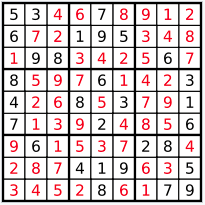

In [18]:
from IPython.display import Image
Image("sudo2.png")

Dada uma tal matriz `m`, é relativamente simples implementar a verificação necessária de cada uma das três condições necessárias (percorrendo cada uma das 9 linhas de `m`, cada uma das 9 colunas de `m` e cada uma dos 9 quadrados 3 × 3 de `m`). Começamos por definir uma função que nos guia pelas 27 verificações necessárias.

In [2]:
def pos(a,b):
    if a<9:
        return (a,b)
    elif a<18:
        return (b,a-9)
    else:
        return (3*((a-18)//3)+b//3,3*((a-18)%3)+b%3)

Com `a` de 0 a 8, percorremos a linha `a` da matriz fazendo `b` percorrer também os valores de 0 a 8.
Com `a` de 9 a 17, percorremos a coluna `a-9` da matriz fazendo `b` percorrer, de novo, os valores de 0 a 8.
Por último, com `a` de 18 a 26, percorremos cada um dos quadrados 3 × 3. Nomeadamente, para cada valor de `a`, percorremos o quadrado cuja entrada superior esquerda corresponde à linha `3*((a-18)//3)` e coluna `3*((a-18)%3)` fazendo, novamente, `b` percorrer os valores de 0 a 8.

Agora, é simples verificar as condições necessárias.

In [3]:
def sudokuQ(m):
    t=[]
    for n in range(10):
        t=t+[0]
    ok=True
    a=0
    while ok and a<27:
        b=0
        while ok and b<9:
            (i,j)=pos(a,b)
            x=m[i][j]
            if t[x-1]==a:
                t[x-1]=a+1
            else:
                ok=False
            b=b+1
        a=a+1
    return ok

In [4]:
m=[[1,5,4,8,7,3,2,9,6],[3,8,6,5,9,2,7,1,4],[7,2,9,6,4,1,8,3,5],[8,6,3,7,2,5,1,4,9],[9,7,5,3,1,4,6,2,8],[4,1,2,9,6,8,3,5,7],[6,3,1,4,5,7,9,8,2],[5,9,8,2,3,6,4,7,1],[2,4,7,1,8,9,5,6,3]]
sudokuQ(m)

True

In [5]:
m=[[5,1,4,8,7,3,2,9,6],[3,8,6,5,9,2,7,1,4],[7,2,9,6,4,1,8,3,5],[8,6,3,7,2,5,1,4,9],[9,7,5,3,1,4,6,2,8],[4,1,2,9,6,8,3,5,7],[6,3,1,4,5,7,9,8,2],[5,9,8,2,3,6,4,7,1],[2,4,7,1,8,9,5,6,3]]
sudokuQ(m)

False

Deixa-se como exercício, por exemplo recorrendo às técnicas abaixo envolvendo algoritmos combinatórios, implementar um algoritmo (de `força bruta`, e portanto muito ineficiente) que dada uma matriz de `sudoku` incompleta como a que se mostra abaixo, calcule a sua solução (que no caso corresponderia à figura já mostrada acima).

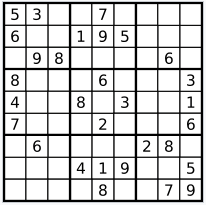

In [15]:
Image("sudo1.png")

Voltaremos a este exemplo mais tarde, no `Notebook 11`.

### Algoritmos combinatórios

Há imensos problemas de natureza combinatória que são extremamente úteis em muitas situações. Pela natureza combinatória do que se pretende calcular, em muitos casos não há algoritmos verdadeiramente eficientes. Pela sua importância, vale a pena determo-nos nalguns exemplos.

Comecemos por considerar o problema de dada uma lista de valores formar a lista de todos os pares de valores da lista. O algoritmo implementa-se facilmente recorrendo a dois ciclos encaixados.

In [44]:
def pares(w):
    res=[]
    for i in range(len(w)):
        for j in range(len(w)):
            res.append([w[i],w[j]])
    return res

In [45]:
pares([4,5,6])

[[4, 4], [4, 5], [4, 6], [5, 4], [5, 5], [5, 6], [6, 4], [6, 5], [6, 6]]

Generalizando a ideia anterior, queremos agora implementar uma função que dado um natural `n` e uma lista de valores `w`, calcula todas as listas de `n` elementos de `w`. Obviamente o comportamento esperado será idêntico ao de `pares` quando `n` tem o valor `2`. 

A ideia da implementação é semelhante, recorrendo agora a 3 ciclos encaixados.

In [46]:
def tuplos(n,w):
    res=[[]]
    for i in range(n):
        new=[]
        for j in range(len(res)):
            for k in range(len(w)):
                new.append(res[j]+[w[k]])
        res=new
    return res
            

In [47]:
tuplos(3,[0,1])

[[0, 0, 0],
 [0, 0, 1],
 [0, 1, 0],
 [0, 1, 1],
 [1, 0, 0],
 [1, 0, 1],
 [1, 1, 0],
 [1, 1, 1]]

Pretendemos agora, dada uma lista `S`, que vemos como se fosse um conjunto, construir a lista de todas as partes de `S`, isto é, a lista de todos os subconjuntos de elementos de `S`. Tiramos partido da função `tuplos` para expressar, usando listas, a função característica de cada um dos subconjuntos.

In [48]:
def partes(S):
    todos=tuplos(len(S),[0,1])
    res=[]
    for car in todos:
        sub=[]
        for i in range(len(S)):
            if car[i]==1:
                sub.append(S[i])
        res.append(sub)
    return res     

In [49]:
partes([1,2,3])

[[], [3], [2], [2, 3], [1], [1, 3], [1, 2], [1, 2, 3]]

Finalmente, pretendemos calcular a lista de todas as permutações de uma lista dada. 

In [50]:
def permutacoes(w):
    res=[[]]
    for x in w:
        nres=[]
        for u in res:
            for i in range(len(u)+1):
                novo=u[:]
                novo.insert(i,x)
                nres+=[novo]
        res=nres
    return res

In [51]:
permutacoes([1,2,3,4])

[[4, 3, 2, 1],
 [3, 4, 2, 1],
 [3, 2, 4, 1],
 [3, 2, 1, 4],
 [4, 2, 3, 1],
 [2, 4, 3, 1],
 [2, 3, 4, 1],
 [2, 3, 1, 4],
 [4, 2, 1, 3],
 [2, 4, 1, 3],
 [2, 1, 4, 3],
 [2, 1, 3, 4],
 [4, 3, 1, 2],
 [3, 4, 1, 2],
 [3, 1, 4, 2],
 [3, 1, 2, 4],
 [4, 1, 3, 2],
 [1, 4, 3, 2],
 [1, 3, 4, 2],
 [1, 3, 2, 4],
 [4, 1, 2, 3],
 [1, 4, 2, 3],
 [1, 2, 4, 3],
 [1, 2, 3, 4]]

Alguns destes algoritmos têm implementações mais sucintas recorrendo a definições por compreensão, um tópico que exploraremos mais tarde.

# Sumário

* A programação imperativa consiste na construção de programas por composição sequencial, alternativa e iterativa, a partir de acções básicas (tipicamente atribuições).
* Os programas imperativos agem por alteração dos valores associados aos nomes locais à sua definição, mas também por efeitos colaterais.
* Advogamos, em todos os momentos os princípio fundamentais da programação estruturada, pelo que não utilizamos mecanismos que permitam a interrupção abrupta de ciclos.
* Pela forma como chegámos à programação imperativa, fica claro que qualquer programa recursivo tem uma programa imperativo equivalente. O contrário também é verdade, como veremos mais tarde.

# Bibliografia

*Introdução à Programação em Mathematica* (3a edição): J. Carmo, A. Sernadas, C. Sernadas, F. M. Dionísio, C. Caleiro, IST Press, 2014.

*Think Python: How to think like a computer scientist*: A. Downey, Green Tea Press, 2012.

*Introduction to Computation and Programming Using Python* (revised and expanded edition): J. V. Guttag, MIT Press,  2013.

*The Art of Computer Programming*: D. E. Knuth, Addison-Wesley (volumes 1--3, 4A), 1998.

*Learning Python* (fifth edition): M. Lutz, O'Reilly Media,  2013.

*Programação em Python: Introdução à programação utilizando múltiplos paradigmas*: J. P. Martins, IST Press, 2015.

*Introdução à Programação em MatLab*: J. Ramos, A. Sernadas e P. Mateus, DMIST, 2005. 

*Learning IPython for Interactive Computing and Data Visualization*: C. Rossant, Packt Publishing,  2013.

*Programação em Mathematica*: A. Sernadas, C. Sernadas e J. Ramos, DMIST, 2003.